#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#### Load data

In [2]:
df = pd.read_stata('DS190_Ad2013v1_Distributable/Data/Stata/Ad2013v1.dta')

In [3]:
# Select relevant columns
df_race = pd.DataFrame()
df_race['Mom'] = df['MomRace'].astype('category')
df_race['Dad'] = df['DadRace'].astype('category')
df_race['Child'] = df['ChildRace'].astype('category')

In [4]:
df_race.head()

,Mom,Dad,Child
0,Black,Black,Black
1,White,White,Black
2,White,White,Black
3,White,White,White
4,White,White,White


In [5]:
df_race.apply(pd.Series.value_counts)/len(df_race)*100

,Mom,Dad,Child
99,6.755849,29.607967,2.969886
AmInd,0.920803,0.592792,1.555090
Asian,0.620455,0.476209,0.478185
Black,17.969491,8.775292,21.277268
HawaiiPI,0.209453,0.162030,0.173886
Hispanic Origin,12.177917,8.615239,21.133022
More than One Race,0.766677,0.511777,7.228106
White,60.579355,51.258694,45.184556


#### Select rows with all data available

In [6]:
df_race_full = df_race[(df_race['Mom'] != 99) & (df_race['Dad'] != 99) & (df_race['Child'] != 99)]

In [7]:
df_race_full.apply(pd.Series.value_counts)/len(df_race_full)*100

,Mom,Dad,Child
99,0.000000,0.000000,0.000000
AmInd,0.902983,0.817853,1.632665
Asian,0.735764,0.681037,0.532060
Black,11.568514,12.258673,15.317260
HawaiiPI,0.237147,0.228026,0.197622
Hispanic Origin,12.027606,12.237390,21.236813
More than One Race,0.805692,0.766167,7.631267
White,73.722295,73.010854,53.452312


#### Select rows with interracial couples

In [8]:
df_race_ir = df_race_full[df_race['Mom'] != df_race['Dad']]
df_race_ir.head()
df_race_ir.apply(pd.Series.value_counts)/len(df_race_ir)*100

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,Mom,Dad,Child
White,47.639887,40.325102,33.698031
Hispanic Origin,25.351672,27.508596,31.603626
Black,9.878087,16.974054,16.380119
More than One Race,6.283214,5.876837,12.003751
AmInd,5.220381,4.345108,4.626446
Asian,4.157549,3.594873,1.031572
HawaiiPI,1.469209,1.375430,0.656455
99,0.000000,0.000000,0.000000


In [9]:
df_race_ir.apply(pd.Series.value_counts)

,Mom,Dad,Child
White,1524,1290,1078
Hispanic Origin,811,880,1011
Black,316,543,524
More than One Race,201,188,384
AmInd,167,139,148
Asian,133,115,33
HawaiiPI,47,44,21
99,0,0,0


In [10]:
def plot_couple_matrix(cm, title='Couples', cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7), dpi=120, facecolor='w', edgecolor='k')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('Mom')
    plt.xlabel('Dad')

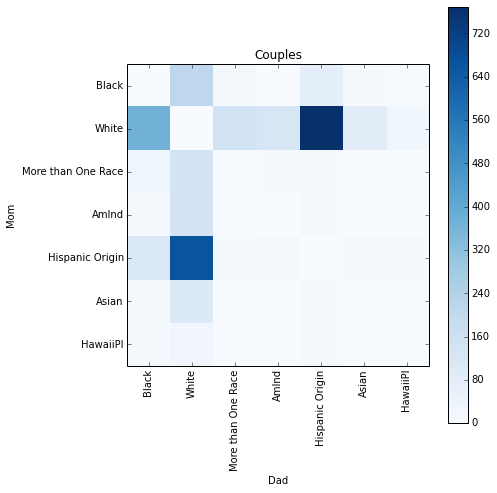

In [11]:
%matplotlib inline
labels = ['Black', 'White', 'More than One Race', 'AmInd', 'Hispanic Origin', 'Asian', 'HawaiiPI']
cm = confusion_matrix(df_race_ir['Mom'], df_race_ir['Dad'], labels)
np.set_printoptions(precision=2)
#print(cm)
plt.figure()
plot_couple_matrix(cm)

In [12]:
# Alternative method
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_race_ir['Mom'])
print(le.classes_)

['AmInd' 'Asian' 'Black' 'HawaiiPI' 'Hispanic Origin' 'More than One Race'
 'White']


In [13]:
df_race_ir['Mom_num'] = le.transform(df_race_ir['Mom'])
df_race_ir['Dad_num'] = le.transform(df_race_ir['Dad'])
df_race_ir.head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Mom,Dad,Child,Mom_num,Dad_num
42,Black,White,Black,2,6
111,White,Asian,White,6,1
118,Black,White,More than One Race,2,6
134,Black,White,More than One Race,2,6
241,More than One Race,White,White,5,6


In [14]:
table = df_race_ir.pivot_table(index ='Mom_num', columns = 'Dad_num', aggfunc = 'count')
parents = table.iloc[:,7:14]

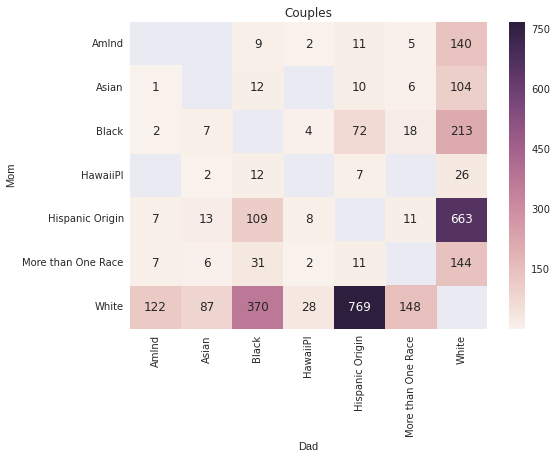

In [15]:
import seaborn as sns
sns.heatmap(parents, annot=True, fmt='g', xticklabels=le.classes_, yticklabels=le.classes_ )
plt.ylabel('Mom')
plt.xlabel('Dad')
sns.plt.title('Couples')